In [3]:
#Importing libraries
import pandas as pd                # Data Manipulation
import numpy as np                 # Numerical Computation
import matplotlib.pyplot as plt    # Basic Visualization
import seaborn as sns              # Statistical Visualization
import plotly.express as px        # Interactive Visualization

In [4]:
# Read the CSV file by using pandas
Study = pd.read_csv("/content/International_Education_Costs.csv")

# Display Top 5 rows of the Dataset
Study.head()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,USA,Cambridge,Harvard University,Computer Science,Master,2.0,55400,83.5,2200,160,1500,1.00
1,UK,London,Imperial College London,Data Science,Master,1.0,41200,75.8,1800,485,800,0.79
2,Canada,Toronto,University of Toronto,Business Analytics,Master,2.0,38500,72.5,1600,235,900,1.35
3,Australia,Melbourne,University of Melbourne,Engineering,Master,2.0,42000,71.2,1400,450,650,1.52
4,Germany,Munich,Technical University of Munich,Mechanical Engineering,Master,2.0,500,70.5,1100,75,550,0.92


**Knowing about Dataset**

In [5]:
# Return overview of the Dataset
Study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [6]:
# Return statistics overview of the numerical columns inside the Dataset
Study.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,16705.016538,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,16582.385275,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,0.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,2850.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,7500.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


In [7]:
# Return number of rows and columns inside the Dataset
Study.shape

(907, 12)

In [8]:
# Returning the number of duplicate rows inside the Dataset
Study[Study.duplicated()]

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate


In [9]:
# Will return True where value is null inside the Dataset
Study.isnull()

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
902,False,False,False,False,False,False,False,False,False,False,False,False
903,False,False,False,False,False,False,False,False,False,False,False,False
904,False,False,False,False,False,False,False,False,False,False,False,False
905,False,False,False,False,False,False,False,False,False,False,False,False


# Problems inside the Dataset

Accuracy :- Min value of Tuition_USD is equal to 0

There are total 103 rows where Tuition_USD = 0

In [10]:
# Returing all 0's inside the Tuition_USD column
Study[Study['Tuition_USD'] == 0].head(5)

,Country,City,University,Program,Level,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
10,Sweden,Stockholm,KTH Royal Institute,Sustainable Technology,Master,2.0,0,71.8,1200,110,400,10.45
11,Denmark,Copenhagen,University of Copenhagen,Bioinformatics,Master,2.0,0,73.4,1300,120,450,6.92
39,Sweden,Lund,Lund University,Neuroscience,PhD,4.0,0,69.5,1000,110,400,10.45
45,Denmark,Aalborg,Aalborg University,Computer Science,Bachelor,3.0,0,69.8,900,120,450,6.92
54,Germany,Berlin,Free University of Berlin,International Business,Bachelor,3.0,0,65.2,900,75,550,0.92


**Column fixing**

There was 103 rows, where Tuition_USD had 0 value and i replaced all 0's with the avg of Tuition_USD country_wise

Replacing and filling NaN vlaues by Country Tuition_USD avg


There were some countries where their average was zero, so I didn’t fill them with Country avg!!!



In [29]:
# Replaced all 0's with NaN values in Tuition_USD column
Study['Tuition_USD'] = Study['Tuition_USD'].replace(0,pd.NA)

# Find the avg of Tuition_USD by Country
country_avg = Study.groupby('Country')['Tuition_USD'].transform('mean')

# Fill all NaN values with Country Tuition_USD Avg
Study['Tuition_USD'] = Study['Tuition_USD'].fillna(country_avg)

/tmp/ipython-input-29-3146971828.py:8: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



Filling left NaN values with global Tuition_USD avg

In [30]:
# Calculated the global average of Tuition_USD
global_avg = Study['Tuition_USD'].mean()

# Filling left NaN values with global Tuition_USD avg
Study['Tuition_USD'] = Study['Tuition_USD'].fillna(global_avg)

# Converting float numbers into integer
Study['Tuition_USD'] = Study['Tuition_USD'].round(0).astype(int)

Minimum values for Tuition_USD is 400 now after filling all zeros

In [31]:
# Give Statistics summary for each numeric column in a DataFrame
Study.describe()

,Duration_Years,Tuition_USD,Living_Cost_Index,Rent_USD,Visa_Fee_USD,Insurance_USD,Exchange_Rate
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,2.836825,17822.888644,64.437486,969.206174,211.396913,700.077178,623.000695
std,0.945449,15921.781592,14.056333,517.154752,143.435740,320.374875,3801.746134
min,1.000000,400.000000,27.800000,150.000000,40.000000,200.000000,0.150000
25%,2.000000,3800.000000,56.300000,545.000000,100.000000,450.000000,0.920000
50%,3.000000,11300.000000,67.500000,900.000000,160.000000,650.000000,1.350000
75%,4.000000,31100.000000,72.200000,1300.000000,240.000000,800.000000,7.150000
max,5.000000,62000.000000,122.400000,2500.000000,490.000000,1500.000000,42150.000000


Creating a column

In [32]:
# Created bins and labels for distributing Tuition_USD values into groups
bins = [0,10000, 25000, 35000, 45000,70000]  # Adjust based on your data range
labels = ['Low', 'Medium', 'High', 'Very High', 'Extremely High']


# Creating a column Tuition_Category
Study['Tuition_Category'] = pd.cut(Study['Tuition_USD'], bins=bins, labels=labels)

In [34]:
# Correlation Heatmap
numeric_cols = Study.select_dtypes(include=np.number)
fig = px.imshow(numeric_cols.corr(), text_auto=True, aspect='auto', color_continuous_scale='RdBu', title='Correlation Heatmap')

fig.show()

Univariate Analysis - (UA) for Numerical Columns


UA for Tuition_USD

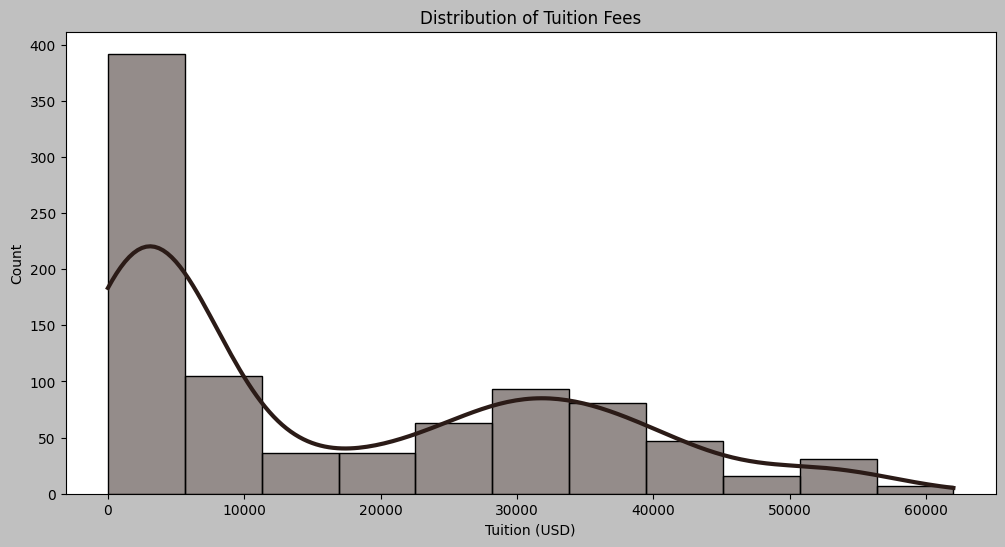

In [12]:
# Set chartsize and background color(grey)
plt.figure(figsize=[12,6], facecolor='#C0C0C0')

# Display Tuition_USD distruibution in histogram and kdeplot
sns.histplot(data=Study, x='Tuition_USD', kde=True, fill=True, color='#2B1B17', line_kws={'linewidth': 3})

# Display title and x-label and y-label
plt.title("Distribution of Tuition Fees")
plt.xlabel("Tuition (USD)")
plt.ylabel("Count")
plt.show()

Finding Outliers for Tuition_USD

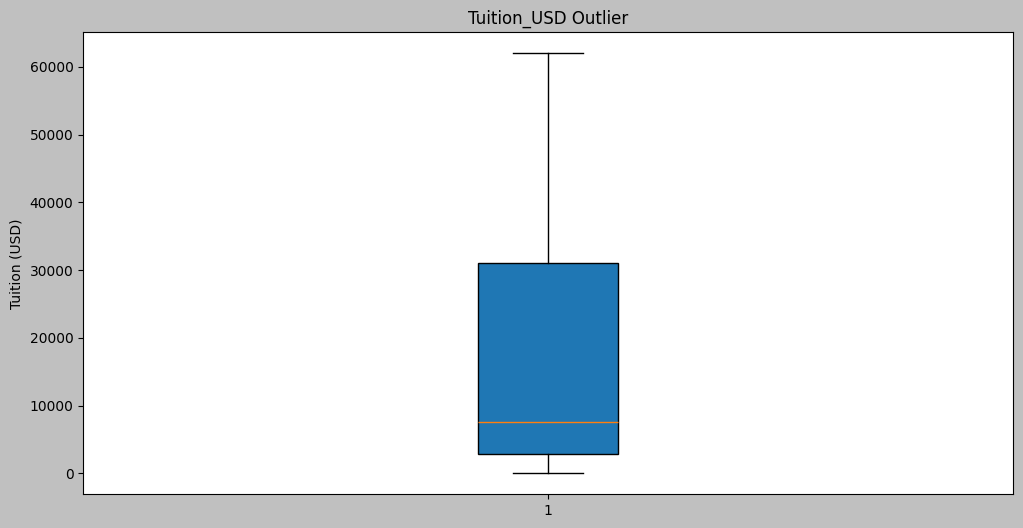

In [13]:
# Changing the size of the graph and background color
plt.figure(figsize=[12,6],facecolor='#C0C0C0')

# Using boxplot for Univariate Analysis to know more about the column
plt.boxplot(Study["Tuition_USD"],patch_artist=True)

# Providing Title and y_label values
plt.title("Tuition_USD Outlier")
plt.ylabel("Tuition (USD)")
plt.show()

UA for Living_Cost_Index

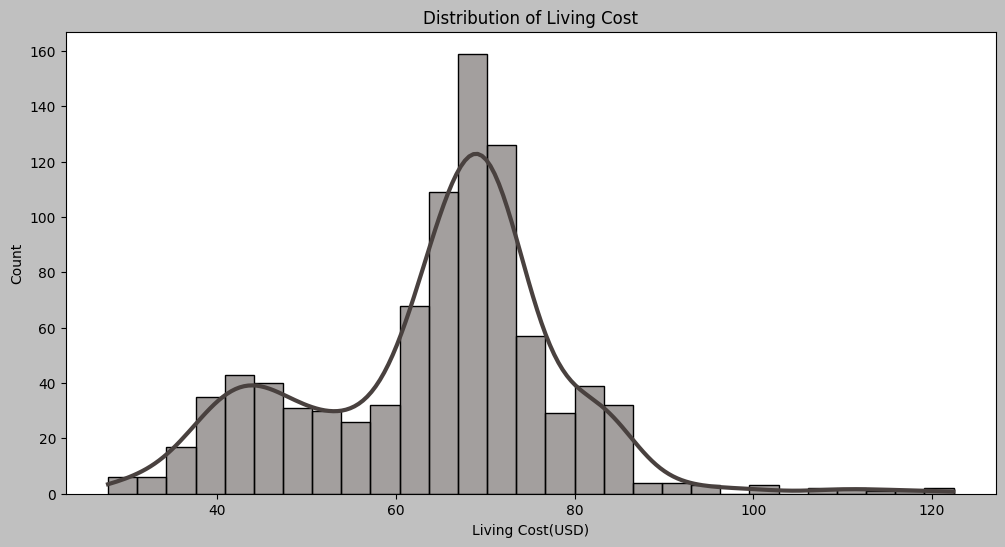

In [14]:
# Set chartsize and background color(grey)
plt.figure(figsize=[12,6], facecolor='#C0C0C0')

# Display Tuition_USD distruibution in histogram and kdeplot
sns.histplot(data=Study, x='Living_Cost_Index', kde=True, fill=True, color='#49413F', line_kws={'linewidth': 3})

# Display title and x-label and y-label
plt.title("Distribution of Living Cost")
plt.xlabel("Living Cost(USD)")
plt.ylabel("Count")
plt.show()

Finding Outliers for Living_Cost_Index

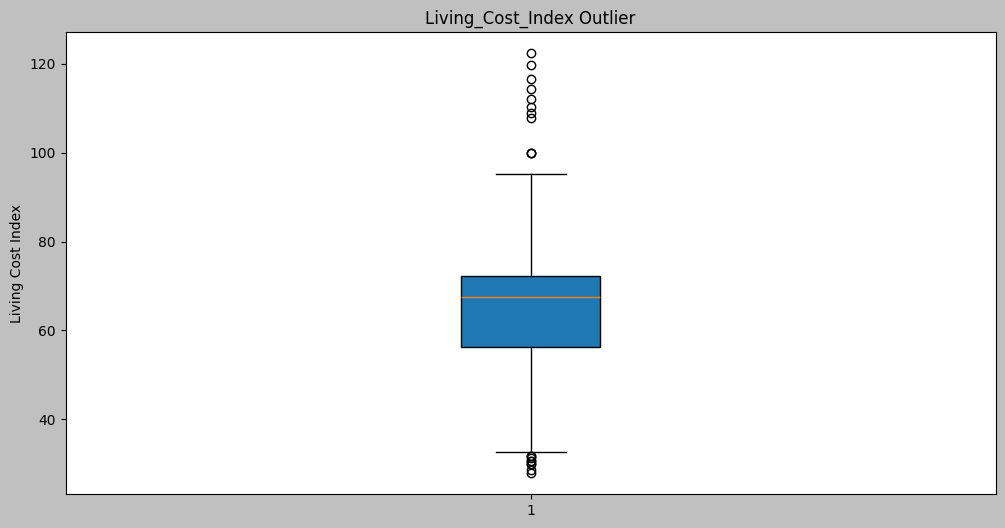

In [28]:
# Changing the size of the graph and background color
plt.figure(figsize=[12,6],facecolor='#C0C0C0')

# Using boxplot for Univariate Analysis to know more about the column
plt.boxplot(Study["Living_Cost_Index"],patch_artist=True)

# Providing Title and y_label values
plt.title("Living_Cost_Index Outlier")
plt.ylabel("Living Cost Index")
plt.show()

UA for Visa Fees

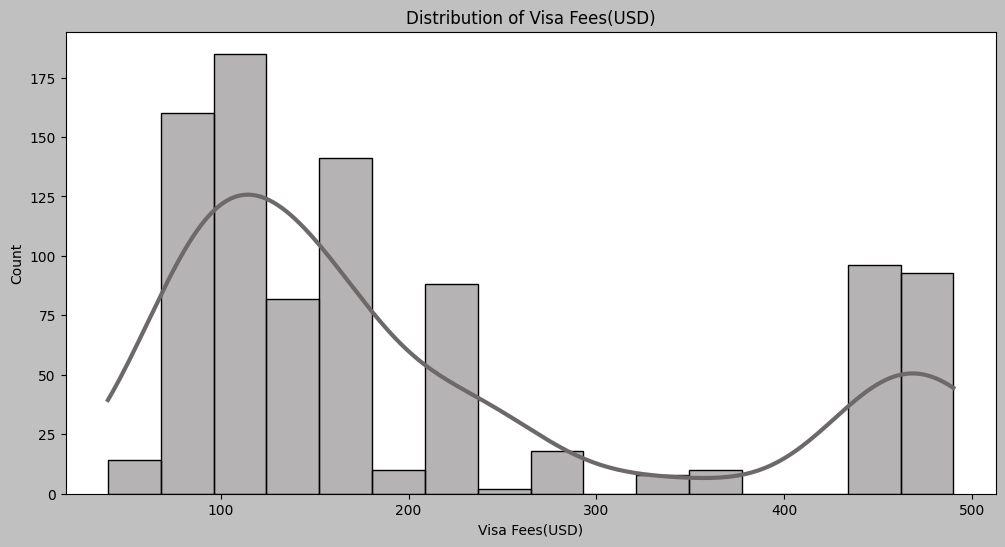

In [15]:
# Set chartsize and background color(grey)
plt.figure(figsize=[12,6], facecolor='#C0C0C0')

# Display Tuition_USD distruibution in histogram and kdeplot
sns.histplot(data=Study, x='Visa_Fee_USD', kde=True, fill=True, color='#6D6968', line_kws={'linewidth': 3})

# Display title and x-label and y-label
plt.title("Distribution of Visa Fees(USD)")
plt.xlabel("Visa Fees(USD)")
plt.ylabel("Count")
plt.show()

Finding Outliers for Visa fees

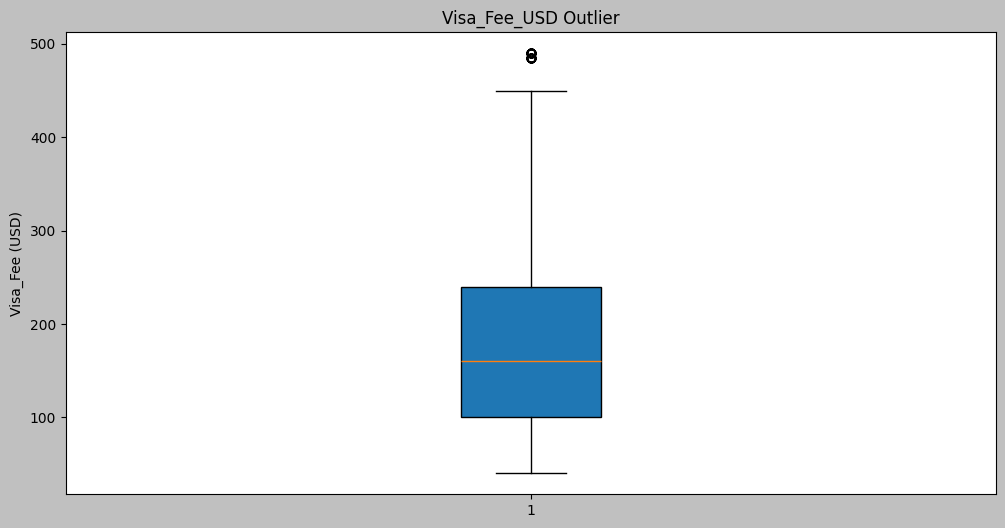

In [16]:
# Changing the size of the graph and background color
plt.figure(figsize=[12,6],facecolor='#C0C0C0')

# Using boxplot for Univariate Analysis to know more about the column
plt.boxplot(Study["Visa_Fee_USD"],patch_artist=True)

# Providing Title and y_label values
plt.title("Visa_Fee_USD Outlier")
plt.ylabel("Visa_Fee (USD)")
plt.show()

UA for Excahnge_ Rate

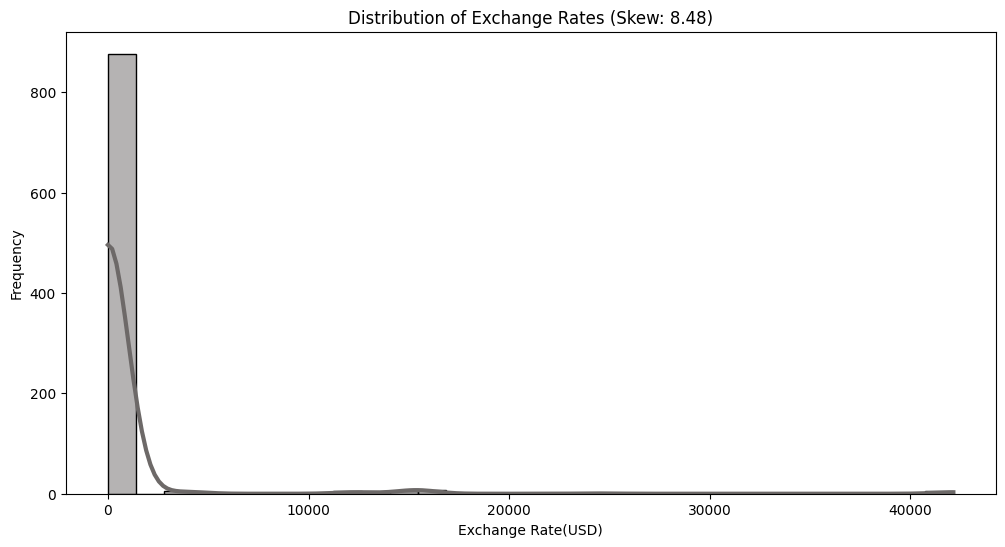

In [17]:
# Skewed (Close to 0 → normal distribution) Exchange_Rate
skew_value = Study['Exchange_Rate'].skew()

# Decide the figure size of the chart
plt.figure(figsize=(12, 6))

# Information is shown in histogram and kde plot
sns.histplot(Study['Exchange_Rate'], bins=30, kde=True, color='#6D6968', line_kws={'linewidth': 3})

# Display title and x-label and y-label
plt.title(f'Distribution of Exchange Rates (Skew: {skew_value:.2f})')
plt.xlabel('Exchange Rate(USD)')
plt.ylabel('Frequency')
plt.show()

Finding Outlier for Exchange Rate

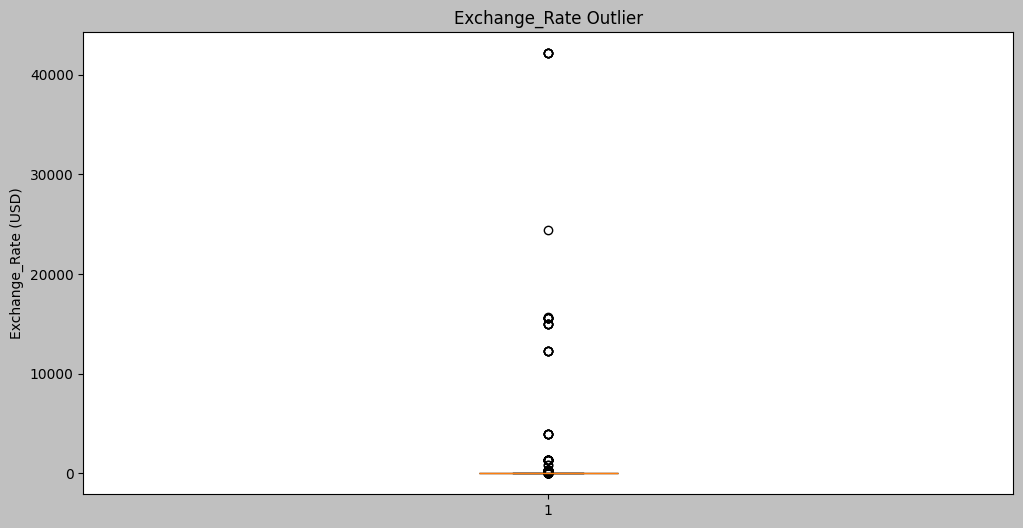

In [18]:
# Changing the size of the graph and background color
plt.figure(figsize=[12,6],facecolor='#C0C0C0')

# Using boxplot for Univariate Analysis to know more about the column
plt.boxplot(Study["Exchange_Rate"],patch_artist=True)

# Providing Title and y_label values
plt.title("Exchange_Rate Outlier")
plt.ylabel("Exchange_Rate (USD)")
plt.show()

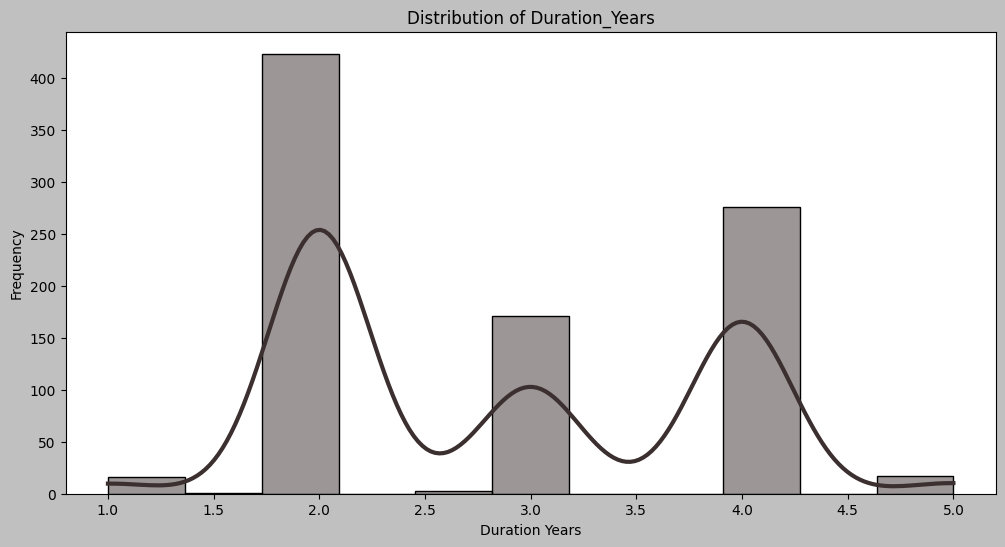

In [19]:
# Set chartsize and background color(grey)
plt.figure(figsize=[12,6], facecolor='#C0C0C0')

# Display Tuition_USD distruibution in histogram and kdeplot
sns.histplot(data=Study, x='Duration_Years', kde=True, fill=True, color='#3B2F2F', line_kws={'linewidth': 3})

# Display title and x-label and y-label
plt.title("Distribution of Duration_Years")
plt.xlabel("Duration Years")
plt.ylabel("Frequency")
plt.show()

Univariate Analysis - (UA) for Categorical Columns

In [20]:
# Created function
def Uni_Analysis(df, x_col, y_col):

    # Create dynamic title from column name
    title = f"Distribution of top 10 {x_col}"

    # Bar chart for single column distribution
    fig = px.bar(df, x = x_col, y = y_col, text_auto=True,template='plotly_white',
                 color_discrete_sequence=['#659EC7'], title=title)

    # Add axis labels and clean layout
    fig.update_layout(xaxis_title = x_col, yaxis_title = "frequency")
    fig.show()

In [21]:
# Calculate the (value_counts) to display (Country) Distribution!!!
info = Study['Country'].value_counts().reset_index().head(10)

# Rename the columns name
info.columns = ['Country', 'Count']

# Call the function and assign the values
Uni_Analysis(info, 'Country', 'Count')

In [23]:
# # Calculate the (value_counts) to display (City) Distribution!!!
info = Study['City'].value_counts().reset_index().head(10)

# Rename the columns name
info.columns = ['City', 'Count']  # Rename for clarity

# Call the function and assign the values
Uni_Analysis(info, 'City', 'Count')

In [24]:
# # Calculate the (value_counts) to display (University) Distribution!!!
info = Study['University'].value_counts().reset_index().head(10)

# Rename the columns name
info.columns = ['University', 'Count']  # Rename for clarity

# Call the function and assign the values
Uni_Analysis(info, 'University', 'Count')

In [25]:
# # Calculate the (value_counts) to display (Program) Distribution!!!
info = Study['Program'].value_counts().reset_index().head(10)

# Rename the columns name
info.columns = ['Program', 'Count']  # Rename for clarity

# Call the function and assign the values
Uni_Analysis(info, 'Program', 'Count')

Bivariate Analysis - (BA)

BA Part 1 with (Tuition Category)

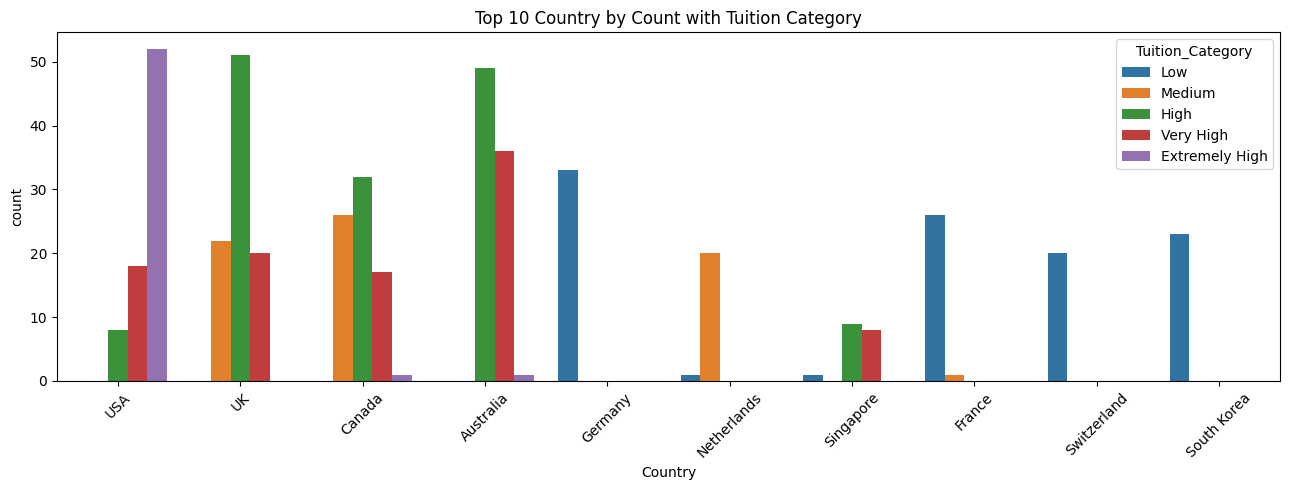

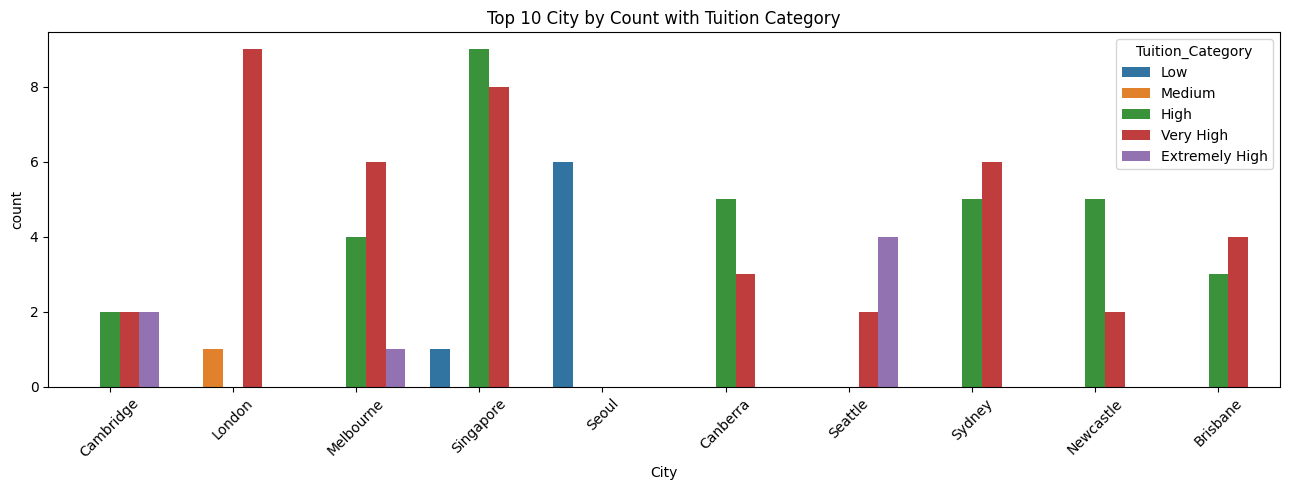

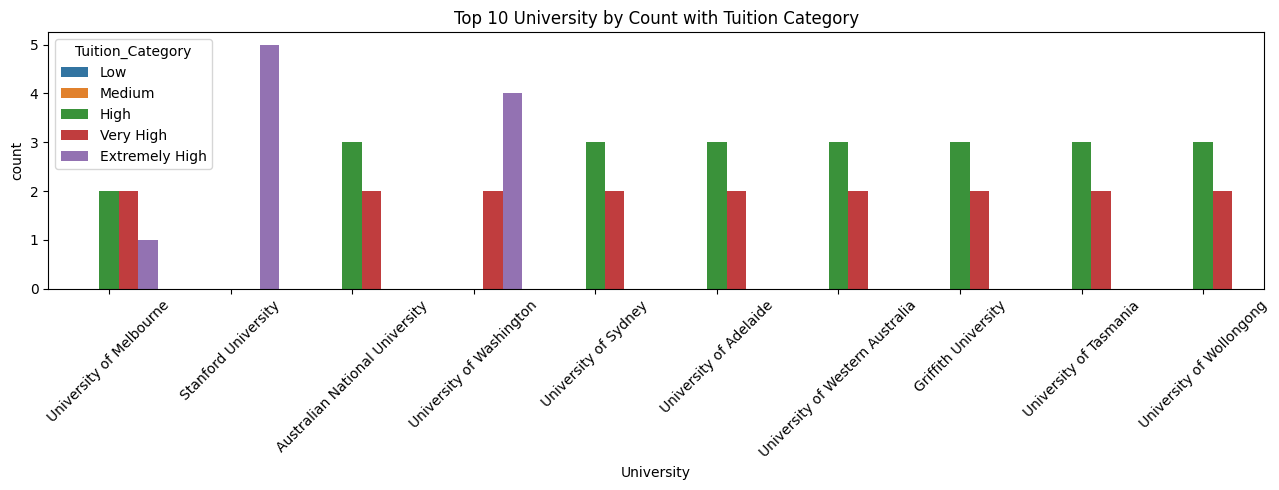

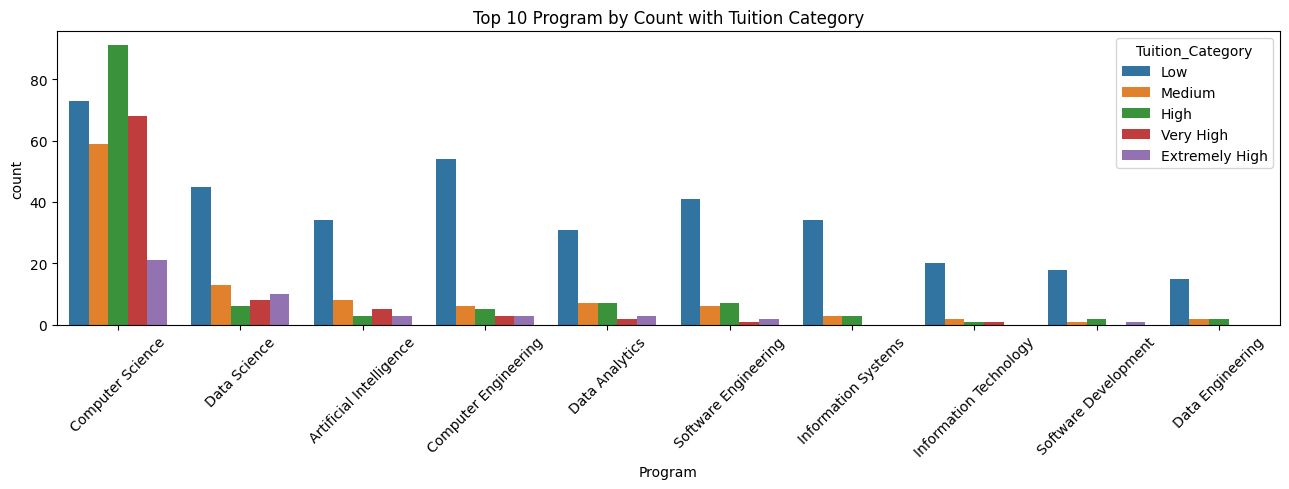

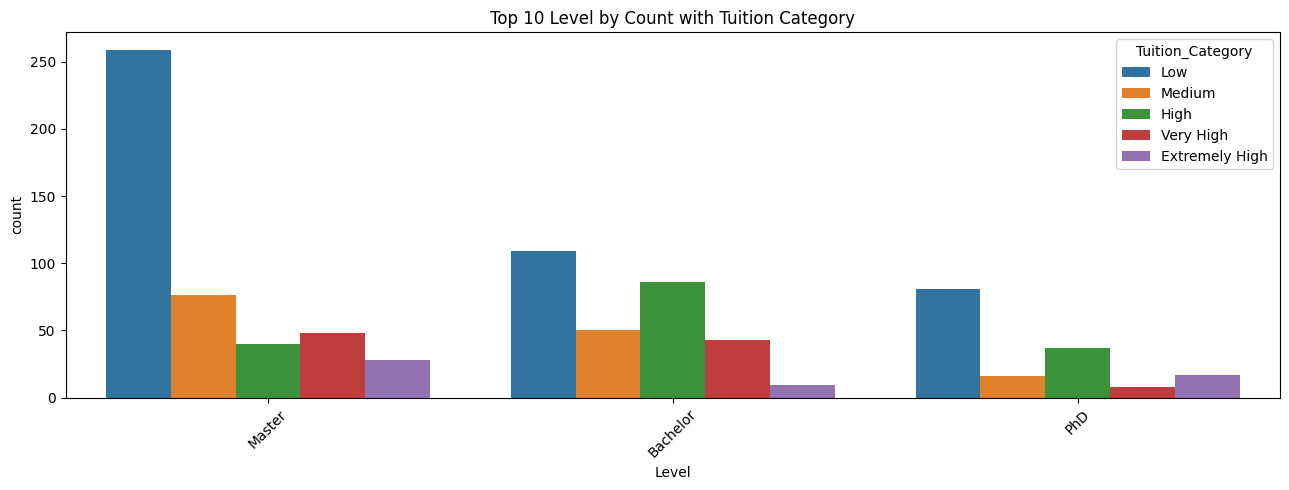

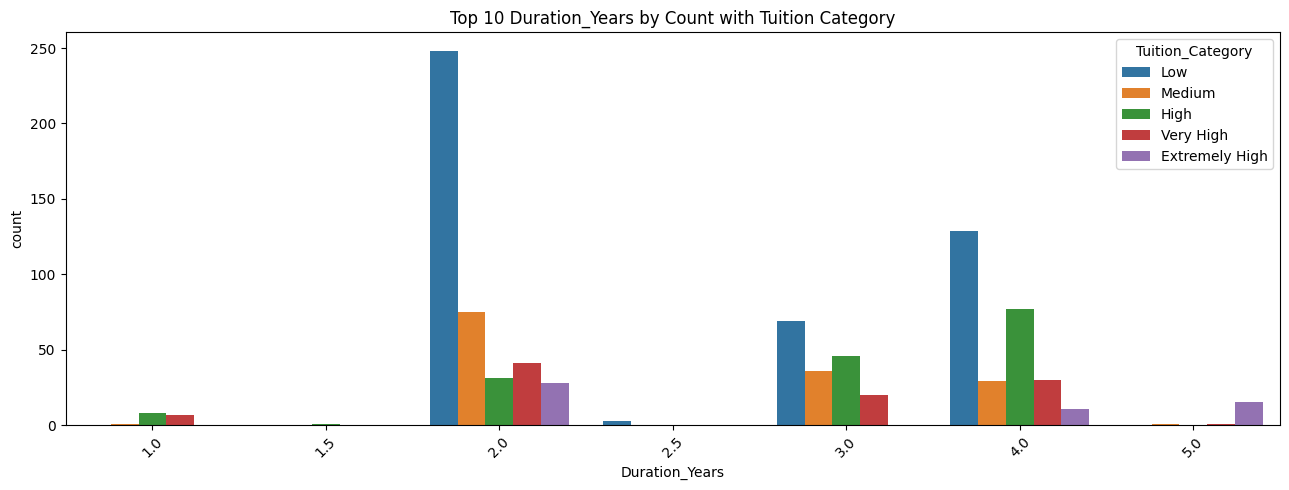

In [35]:
# Bivariate Analysis with given columns with Tuition_Category
top_columns = ['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years']

# Iteration
for col in top_columns:
    # Get top 10 categories by frequency
    top_10_values = Study[col].value_counts().head(10).index

    # Filter dataset to only include rows with those top values
    filtered_df = Study[Study[col].isin(top_10_values)]

    # Graph
    plt.figure(figsize=(13, 5))
    sns.countplot(data=filtered_df, x=col, hue="Tuition_Category")
    plt.title(f"Top 10 {col} by Count with Tuition Category")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

BA Part 2 with (Level)

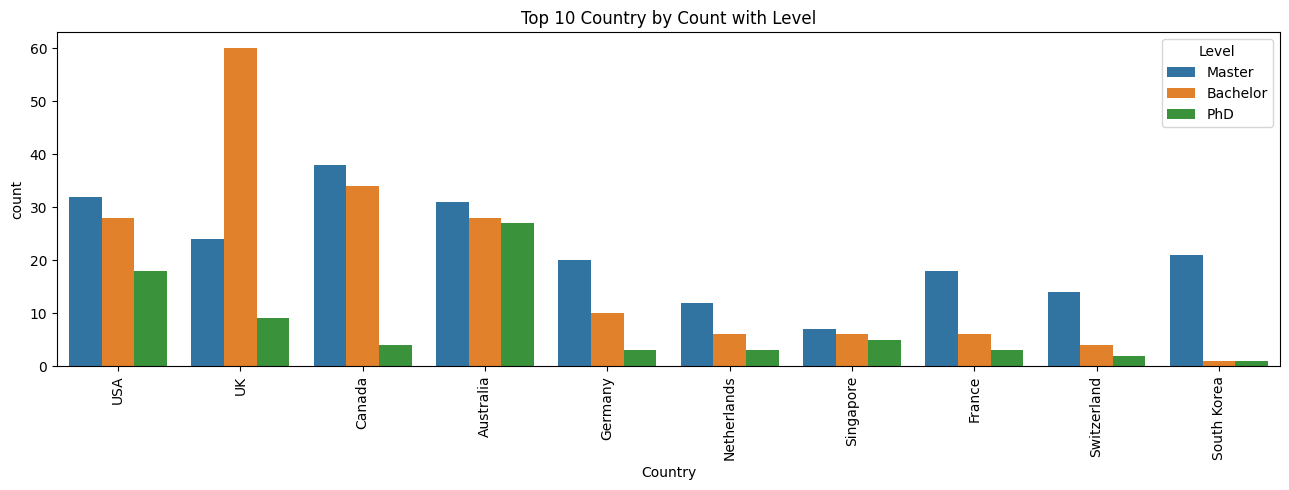

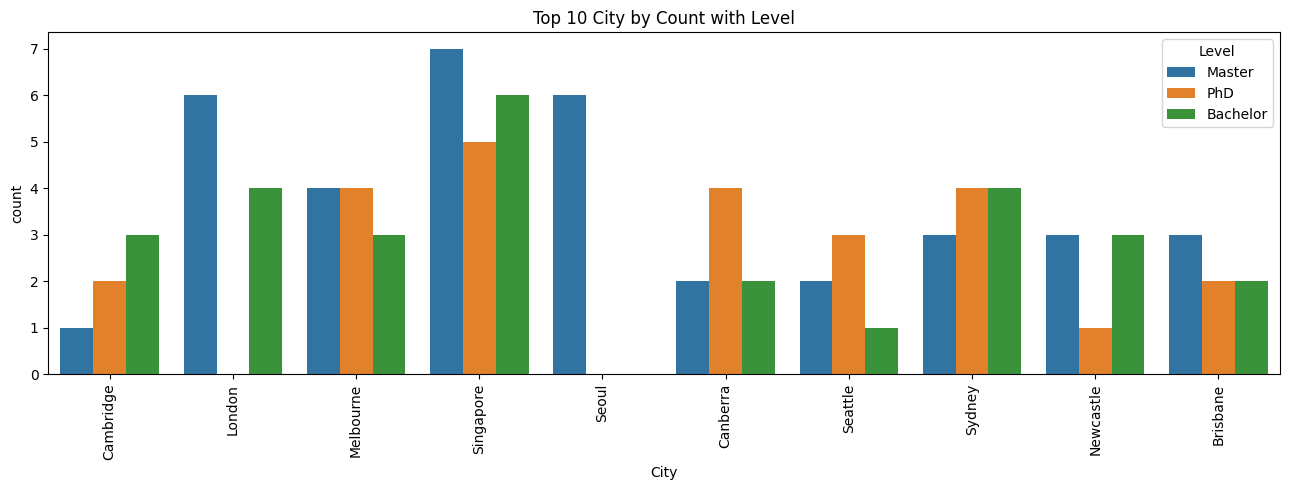

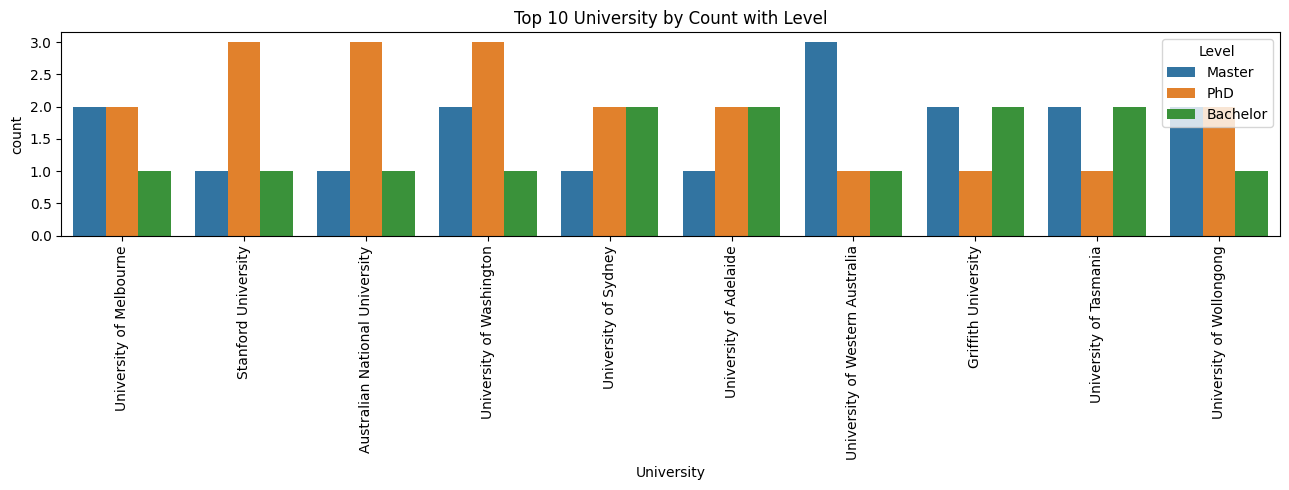

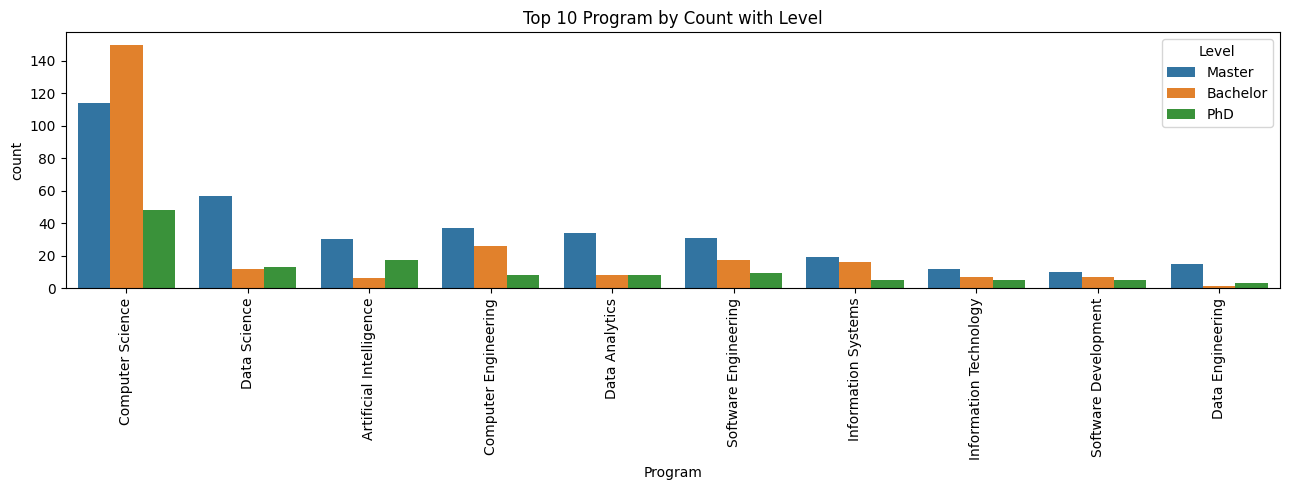

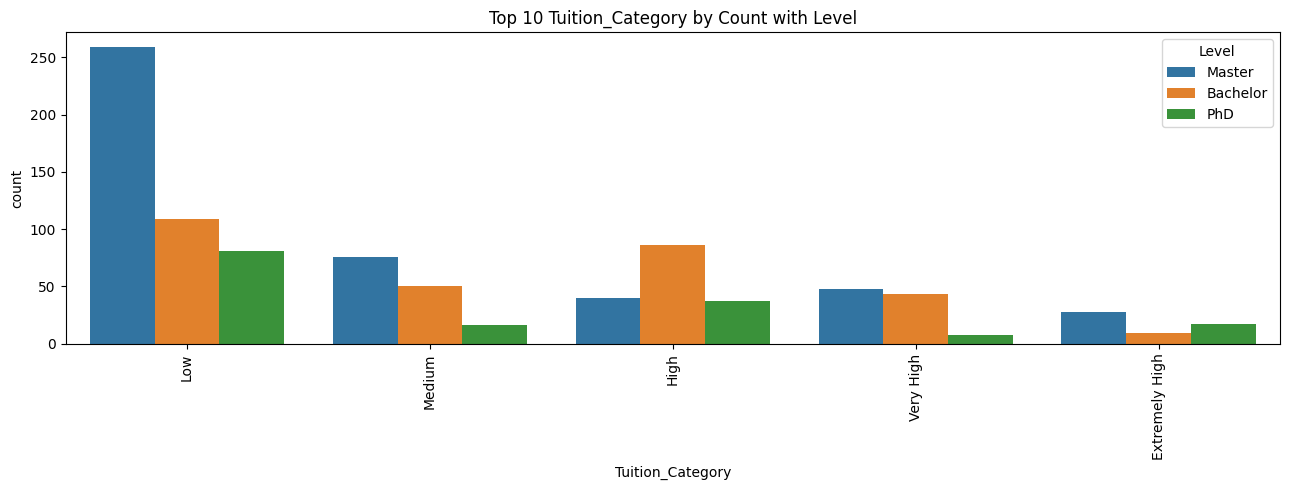

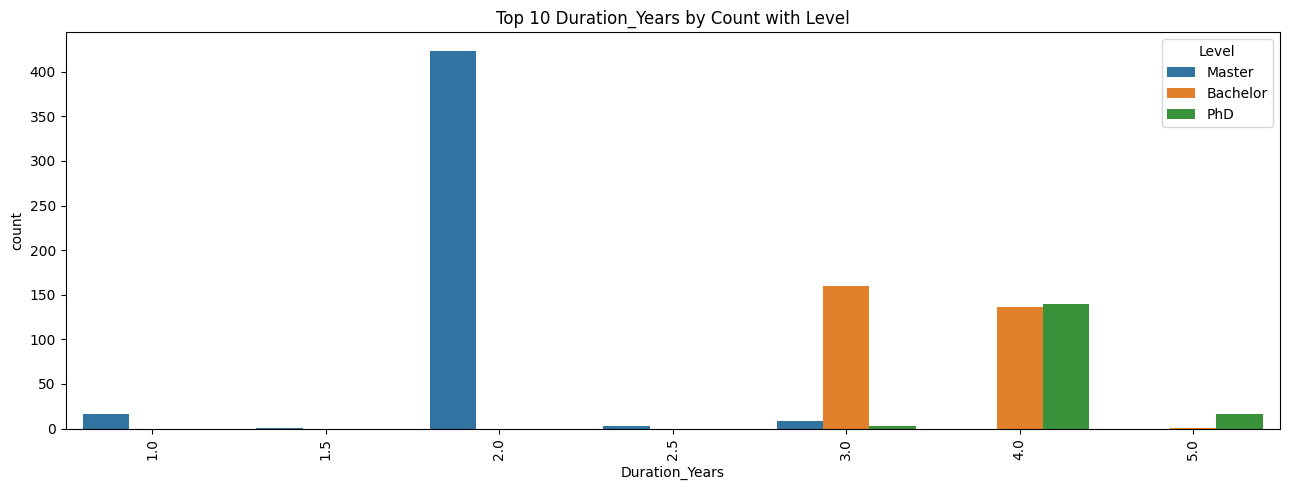

In [36]:
# Bivariate Analysis with given columns with Level
top_columns = ['Country', 'City', 'University', 'Program', 'Tuition_Category', 'Duration_Years']

# Iteration
for col in top_columns:
    # Get top 10 categories by frequency
    top_10_values = Study[col].value_counts().head(10).index

    # Filter dataset to only include rows with those top values
    filtered_df = Study[Study[col].isin(top_10_values)]

    # Graph
    plt.figure(figsize=(13, 5))
    sns.countplot(data=filtered_df, x=col, hue="Level")
    plt.title(f"Top 10 {col} by Count with Level")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Visualization

In [39]:
# Create a new DataFrame from existing DF by filtering the data
Country_count = Study['Country'].value_counts().reset_index().rename(columns={'index': 'Country', 'count': 'Total_Num'})

# Used bar chart to display all values
px.bar(Country_count.head(15), x='Country', y='Total_Num',text_auto=True,color_discrete_sequence=['#659EC7'],
      title='Distribution of Programs Across Top 15 Countries',template='presentation')

In [40]:
# Created function
def show_country_sunburst(df, selected_country):

    # Filter the data for the selected country
    filtered_df = df[df['Country'] == selected_country]

    # Create sunburst chart
    fig = px.sunburst(filtered_df,path=['Country', 'City', 'Program','University', 'Level'],values='Tuition_USD',
                      title=f"Education Distribution for {selected_country}",color_continuous_scale='Blues',
                      template='presentation',width=700,height=700)

    # Display the Graph
    fig.show()

# Assign the County Name: ['Inida','USA', 'UK', 'Canada', Australia]
country_name = "India"

# Calling a function and Assigning argument to both the parameters
show_country_sunburst(Study, country_name)

In [41]:
# All levels are grouped and calculated Tuition_USD
Level_Distributed = Study.groupby(['Level'])['Tuition_USD'].mean().round().sort_values(ascending=False).reset_index()

# Funnel chart for Level distribution with an AVG of Tuition_USD
px.funnel(Level_Distributed,x='Tuition_USD',y='Level',color_discrete_sequence=['#566D7E'],
          title="Avg Tuition Fee by Level",template='presentation')

In [42]:
# All levels are grouped and calculated Tuition_USD
Program_Distributed = Study.groupby(['Program'])['Tuition_USD'].mean().round().sort_values(ascending=False).reset_index()

# Funnel chart for program distribution with an AVG of Tuition_USD
px.funnel(Program_Distributed,x='Tuition_USD',y='Program',color_discrete_sequence=['#3B3131'],
          title="Avg Tuition Fee by Program",template='ggplot2')

In [43]:
# Grouped all countries and calculated mean exchange rate!!!
Country_Exchange_Rate = Study.groupby(['Country'])['Exchange_Rate'].mean().reset_index().round(2)

# Scatter plot for Country Exchange Rate!!!
fig = px.scatter(Country_Exchange_Rate,x='Country',y='Exchange_Rate',title='Country Exchange Rate with (USD)',
                 template='plotly_dark',width=980,height=500,
                 color_discrete_sequence=['#E6E6FA'])

# Controling the size of the Scatter points!
fig.update_traces(marker=dict(size=10))

fig.show()

In [44]:
# Created function
def show_program_sunburst(df, selected_program):

    # Filter the data for the selected program
    filtered_df = df[df['Program'] == selected_program]

    # Create sunburst chart
    fig = px.sunburst(filtered_df,path=['Program','Level','Country','City','University'],values='Tuition_USD',
                      title=f"Education Distribution for {selected_program}",color_continuous_scale='Blues',
                      template='presentation',width=650,height=650)

    # Display the Graph
    fig.show()

# Assign the Program Name: ['Data Science', 'Business Analytics','Artificial Intelligence', 'Mechanical Engineering',
# 'Data Analytics','Business','Robotics', 'Neuroscience', 'Economics', 'Psychology']
program_name = "Data Analytics"

# Calling a function and Assigning argument to both the parameters
show_program_sunburst(Study, program_name)

In [45]:
# Grouped all countries and calculated mean Living_Cost_Index
Country_Exchange_Rate = Study.groupby(['Country'])['Living_Cost_Index'].mean().reset_index().round(2)

# Scatter plot for Country Living Cost
fig = px.scatter(Country_Exchange_Rate,x='Country',y='Living_Cost_Index',title='Living Cost in (USD) by Countries',
                 template='plotly_dark',width=980,height=500,
                 color_discrete_sequence=['#77DD77'])

# Controling the size of the Scatter points!
fig.update_traces(marker=dict(size=10))

fig.show()

In [46]:
# Grouped all countries and calculated mean Insurance
Country_Exchange_Rate = Study.groupby(['Country'])['Insurance_USD'].mean().reset_index().round(2)

# Scatter plot for Country Living Cost
fig = px.scatter(Country_Exchange_Rate,x='Country',y='Insurance_USD',title='Countries Insurance Price in (USD)',
                 template='plotly_dark',width=980,height=500,
                 color_discrete_sequence=['#FF7F50'])

# Controling the size of the Scatter points!
fig.update_traces(marker=dict(size=10))

fig.show()